In [27]:
# import libraries
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# import emnist/balanced dataset
from emnist import extract_training_samples
training_images, training_labels = extract_training_samples("balanced")
from emnist import extract_test_samples
testing_images, testing_labels = extract_test_samples("balanced")

In [3]:
# keras model handles values from 0 to 1, given image pixels are from 0 to 255
training_images = training_images / 255.0
testing_images = testing_images / 255.0

# cnns require color images, given images are grayscale
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# parameters for cnns
num_filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)

In [4]:
# defining layers of the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(num_filters, kernel_size, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size),
    tf.keras.layers.Conv2D(num_filters, kernel_size, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(47, activation="softmax")
])

# setting optimization + loss functions for the model
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# training model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
3525/3525 [==============================] - 55s 15ms/step - loss: 0.6917 - accuracy: 0.7814
Epoch 2/5
3525/3525 [==============================] - 54s 15ms/step - loss: 0.4102 - accuracy: 0.8579
Epoch 3/5
3525/3525 [==============================] - 54s 15ms/step - loss: 0.3495 - accuracy: 0.8748
Epoch 4/5
3525/3525 [==============================] - 54s 15ms/step - loss: 0.3144 - accuracy: 0.8843
Epoch 5/5
3525/3525 [==============================] - 55s 16ms/step - loss: 0.2881 - accuracy: 0.8922


In [5]:
# evaluating accuracy
test_loss, test_acc = model.evaluate(testing_images, testing_labels)
print("test accuracy: " + str(np.round(100 * test_acc, decimals=2)) + "%")
print("test loss: " + str(np.round(100 * test_loss, decimals=2)) + "%")

588/588 [==============================] - 3s 4ms/step - loss: 0.3759 - accuracy: 0.8706
test accuracy: 87.06%
test loss: 37.59%


In [6]:
# numpy 2d array of probabilities of each class for each image
predictions = model.predict(testing_images)

# display image, prediction, confidence
def display_prediction(image, prediction):
    plt.imshow(image, cmap="gray")
    predicted_class_idx = np.argmax(prediction)
    predicted_class = class_mapping[predicted_class_idx]
    confidence = prediction[predicted_class_idx]
    plt.title("prediction: " + str(predicted_class) + " (" + str(np.round(100 * confidence, decimals=2)) + "%)")

# convert predicted class to digit or lowercase letter
class_mapping = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

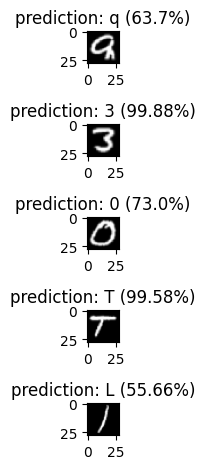

In [28]:
# plot predictions for 5 random images
for i in range(5):
    n1 = randint(0, testing_images.shape[0] - 1)
    plt.subplot(5, 1, i + 1)
    display_prediction(testing_images[n1], predictions[n1])
plt.tight_layout()
plt.show()

In [11]:
def get_class_labels(arr):
    class_labels = np.chararray(arr.shape)
    for idx, ele in enumerate(arr):
        class_labels[idx] = class_mapping[int(ele)]
    return class_labels

In [12]:
final_predictions = np.zeros(len(predictions))
for idx, ele in enumerate(predictions):
    final_predictions[idx] = np.argmax(ele)
matrix = confusion_matrix(get_class_labels(testing_labels), get_class_labels(final_predictions))

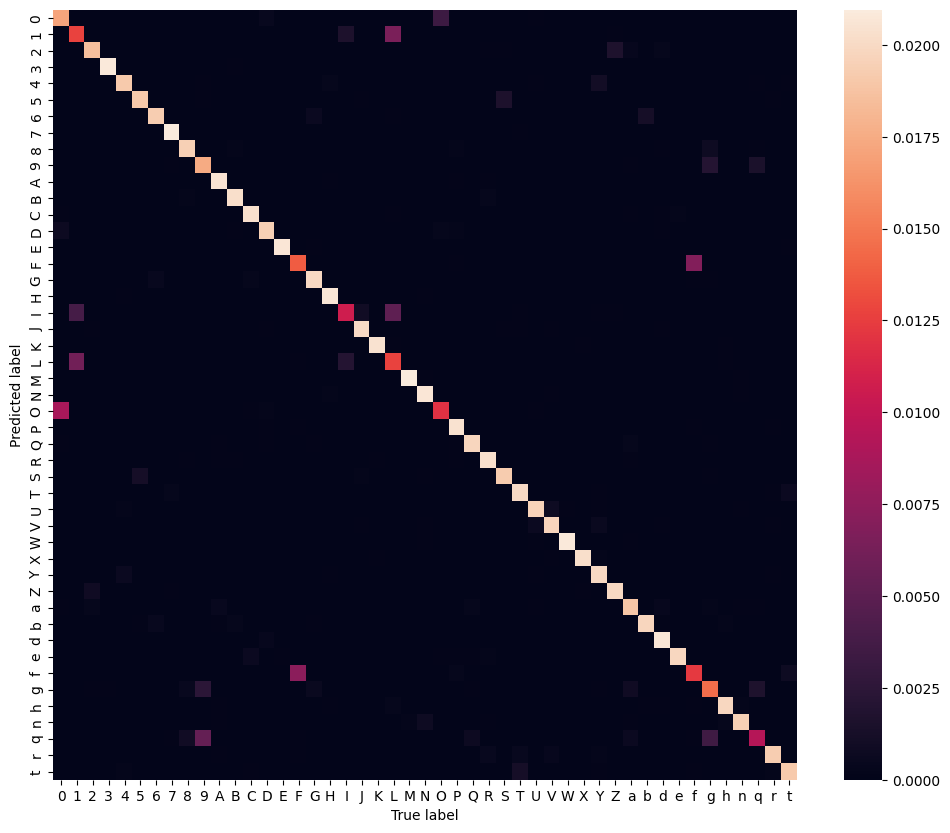

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(matrix/np.sum(matrix), xticklabels=list(class_mapping), yticklabels=list(class_mapping))
plt.xlabel('True label')
plt.ylabel('Predicted label')